# Implementing Linear Regression

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20.0, 10.0)

# reading data
data = pd.read_csv('./Datasets/headbrain.csv')
print(data.shape)
data.head(5)

(237, 4)


,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [2]:
#Collecting X and Y
X = data['Head Size(cm^3)'].values
Y = data['Brain Weight(grams)'].values

In [3]:
#Lets Calculate Mean of X and Y
x_mean = np.mean(X)
y_mean = np.mean(Y)

# number of datasets
N = len(X)

Lets calculate slope of the line, Formula of slope is 

\begin{equation*}
m= \sum_{k=1}^n \frac{(X_i - X` ) (Y_i - Y`) }{ (X_i-X`)^2}
\end{equation*} 

In [5]:
numer = 0
denom = 0

for i in range(N):
    numer += (X[i] - x_mean)*(Y[i] - y_mean)
    denom += (X[i] - x_mean) ** 2
M = numer / denom
c = y_mean - ( M * x_mean)
print(M,c)

0.26342933948939945 325.57342104944223


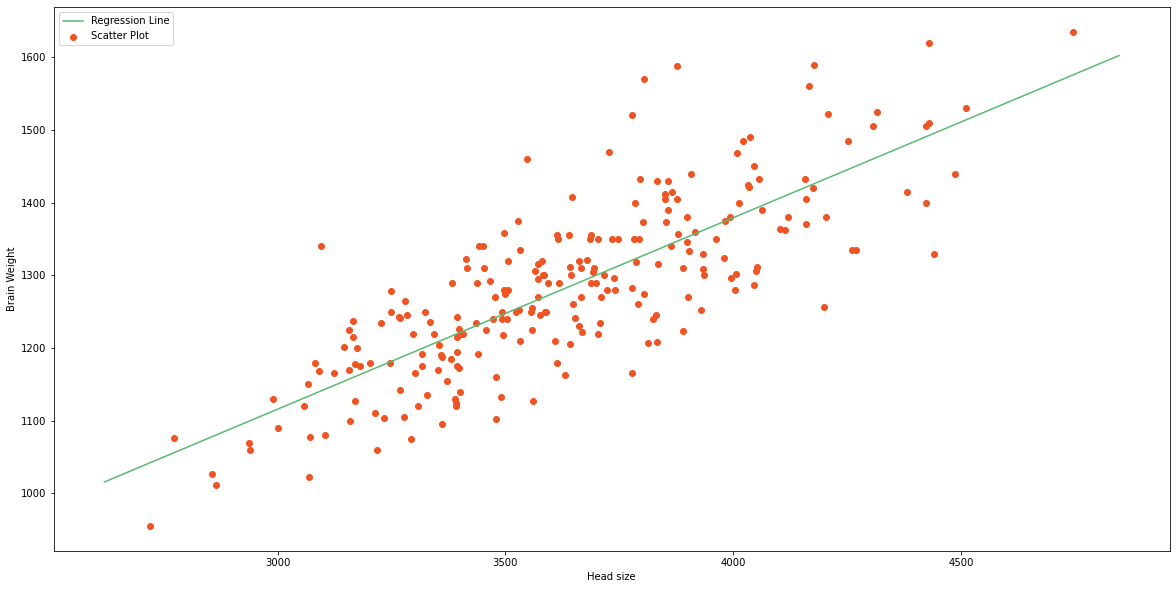

In [11]:
# lets plot the line

max_x = np.max(X) + 100
min_x = np.min(X) - 100

x = np.linspace(min_x, max_x, 1000 )
y = M*x + c

plt.plot(x,y, color='#58b970', label='Regression Line')
plt.scatter(X,Y, color= '#ef5423', label='Scatter Plot')
plt.xlabel('Head size')
plt.ylabel('Brain Weight')
plt.legend()
plt.show()

Lets calculate r**2

\begin{equation*}
r^2= 1 - \sum_{k=1}^n \frac{Y_i - Y_m }{ Y_i-Y_p}
\end{equation*} 

In [13]:
ss_t = 0
ss_r = 0
for i in range(N):
    y_prec = M * X[i] + c
    ss_t += (Y[i] - y_mean)**2
    ss_r += (Y[i] - y_prec)**2
r2 = 1 -  (ss_r/ss_t)
print(r2)

0.6393117199570003


# Now the same above process using sklearn

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
# can't use Rank 1 matrix in sckit learn
X = X.reshape((N,1))
# creating Model
reg = LinearRegression()
# Training Model
reg = reg.fit(X,Y)
# predecting values
y_pred = reg.predict(X)

# calculate R^2 Score

r2_score = reg.score(X, Y)
print(r2_score)

0.639311719957
